In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
%matplotlib inline
pd.set_option("display.max.columns", None)

In [5]:
df = pd.read_csv('/Users/kevinmarlis/Developer/Thesis/Data Sources/Healthy Places Index/HPI-Master-Files-2019-04-24/HPI2_MasterFile_2019-04-24.csv', encoding= 'unicode_escape')

In [7]:
print(df.shape)
df.head()

(8057, 91)


,CensusTract,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,hpi2_pctile_pos,hpi2_pctile_neg,hpi_top25pct,quintiles,quartiles,economic,economic_pctile,education,education_pctile,housing,houseing_pctile,healthcareaccess,healthcareaccess_pctile,neighborhood,neighborhood_pctile,pollution,pollution_pctile,transportation,transportation_pctile,social,social_pctile,insured,insured_pctile,uncrowded,uncrowded_pctile,homeownership,homeownership_pctile,automobile,automobile_pctile,commute,commute_pctile,inpreschool,inpreschool_pctile,inhighschool,inhighschool_pctile,bachelorsed,bachelorsed_pctile,employed,employed_pctile,abovepoverty,abovepoverty_pctile,income,income_pctile,retail,retail_pctile,parkaccess,parkaccess_pctile,treecanopy,treecanopy_pctile,alcoffsale,alcoffsale_pctile,voting,voting_pctile,ownsevere,ownsevere_pctile,rentsevere,rentsevere_pctile,houserepair,houserepair_pctile,twoparents,twoparents_pctile,supermkts,supermkts_pctile,ozone,ozone_pctile,pm25,pm25_pctile,dieselpm,dieselpm_pctile,h20contam,h20contam_pctile,LEB,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,6001400100,2937,0.1,Oakland,94704.0,6001,Alameda,urban_area,1.182028,99.114590,0.885410,Yes,1.0,1.0,1.735963,98.691133,0.948968,90.093674,0.730552,90.003850,1.285242,93.814962,0.832170,98.395996,0.878125,92.377775,0.616855,95.226485,1.336602,96.881817,95.0,93.814962,99.3,89.464904,85.5,92.005646,98.6,87.475940,15.284553,82.882074,53.7,53.714872,100.0,100.000000,79.7,98.678301,73.7,68.920826,92.378049,96.445528,174113.0,99.101758,9.587563,97.600411,100.00000,81.355062,36.433798,97.420762,73.169901,64.121648,82.781682,93.224689,5.092593,90.068010,27.272727,45.784679,100.000000,80.816117,93.074792,92.480431,1.319206,13.396638,0.029592,96.086231,8.697944,74.759399,27.436933,18.927242,70.599583,97.202618,86.985506,96.663673,70.752469,4.766769,15.526047,3.983657,3.779367,0.068097,0.272387,0.851209,Wed13Dec17
1,6001400200,1974,3.5,Oakland,94618.0,6001,Alameda,urban_area,1.325874,99.704863,0.295137,Yes,1.0,1.0,1.808761,99.037598,1.137725,94.649044,0.959728,96.830489,1.004971,83.985628,0.503232,94.379571,0.657261,85.628128,1.494366,99.653535,1.227116,94.687540,91.6,83.985628,100.0,96.933145,63.6,59.502117,94.1,46.028487,41.950758,96.791993,64.7,67.791608,100.0,100.000000,82.9,99.448223,85.6,99.178750,88.760081,90.966252,141806.0,96.650841,2.448043,82.651097,91.79331,50.263057,19.708371,92.467599,28.419453,26.831772,85.492572,97.805723,3.883495,94.187091,2.666667,97.895547,99.386503,51.148467,87.012987,77.993071,100.000000,94.251251,0.029592,96.086231,8.697944,74.759399,42.190000,5.569100,70.599583,97.202618,86.957616,96.612344,78.318136,1.570415,7.396150,7.649443,4.812563,0.101317,0.000000,0.151976,Wed13Dec17
2,6001400300,4865,0.8,Oakland,94618.0,6001,Alameda,urban_area,0.925666,95.932247,4.067753,Yes,1.0,1.0,1.014492,87.244963,1.348314,98.165020,0.603628,84.088284,1.268756,93.186193,-0.291977,19.940973,0.657261,85.628128,0.822268,97.202618,1.078500,90.966252,94.8,93.186193,100.0,96.933145,44.3,33.850892,85.5,14.115232,37.873988,96.047735,100.0,95.714102,100.0,100.000000,68.8,94.353907,81.4,95.277813,85.743879,85.307327,84598.0,74.990376,1.890912,76.478891,33.25797,15.834723,5.838530,57.320672,16.690647,19.312203,82.086597,91.813166,7.359307,79.070961,12.177122,88.771975,100.000000,80.816117,87.221571,78.429360,92.745177,80.354164,0.029592,96.086231,8.697944,74.759399,42.190000,5.569100,70.599583,97.202618,86.462942,95.136661,66.927030,10.524152,8.612539,8.201439,5.056526,0.164440,0.102775,0.411100,Wed13Dec17
3,6001400400,3703,0.9,Oakland,94609.0,6001,Alameda,urban_area,1.117603,98.537149,1.462851,Yes,1.0,1.0,1.277657,93.622482,0.939501,89.914025,0.356477,68.381881,1.301729,94.430900,0.070027,57.936610,0.657261,85.628128,1.756657,99.910176,1.295417,96.253048,95.2,94.430900,99.2,88.258694,37.9,26.305659,92.9,38.611574,49.724518,98.011036,72.3,75.683306,97.2,22.276402,75.5,97.215450,84.6,

In [9]:
# Filter df to only consist of LA County census tracts
la_county_df = df[df['County_Name'] == 'Los Angeles']

In [10]:
print(la_county_df.shape)
la_county_df.head()

(2346, 91)


,CensusTract,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,hpi2_pctile_pos,hpi2_pctile_neg,hpi_top25pct,quintiles,quartiles,economic,economic_pctile,education,education_pctile,housing,houseing_pctile,healthcareaccess,healthcareaccess_pctile,neighborhood,neighborhood_pctile,pollution,pollution_pctile,transportation,transportation_pctile,social,social_pctile,insured,insured_pctile,uncrowded,uncrowded_pctile,homeownership,homeownership_pctile,automobile,automobile_pctile,commute,commute_pctile,inpreschool,inpreschool_pctile,inhighschool,inhighschool_pctile,bachelorsed,bachelorsed_pctile,employed,employed_pctile,abovepoverty,abovepoverty_pctile,income,income_pctile,retail,retail_pctile,parkaccess,parkaccess_pctile,treecanopy,treecanopy_pctile,alcoffsale,alcoffsale_pctile,voting,voting_pctile,ownsevere,ownsevere_pctile,rentsevere,rentsevere_pctile,houserepair,houserepair_pctile,twoparents,twoparents_pctile,supermkts,supermkts_pctile,ozone,ozone_pctile,pm25,pm25_pctile,dieselpm,dieselpm_pctile,h20contam,h20contam_pctile,LEB,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
1171,6037101110,4731,1.9,Los Angeles,91042.0,6037,Los Angeles,urban_area,-0.329010,29.616322,70.383678,No,4.0,3.0,-0.215356,41.075324,-0.696965,12.819197,-0.518151,19.260875,0.263074,53.663544,-0.088804,36.558450,-0.192949,37.135891,-0.122011,30.206596,-0.774822,18.054664,82.6,53.663544,92.6,42.730656,46.4,36.391634,95.2,53.753368,2.587018,22.622867,0.0,1.873476,100.0,100.000000,19.4,37.469524,70.2,50.327217,58.396947,38.046965,50694.0,35.608880,1.184600,62.671628,97.42126,57.372001,5.855637,57.513153,48.890298,41.768254,52.212960,8.597459,22.981366,9.341717,33.879781,24.932632,97.093023,13.897087,74.819401,40.639035,26.830773,33.761068,0.055122,23.970230,11.21,39.715129,4.579248,88.130373,618.051447,32.092904,78.814964,25.818042,56.140351,1.564151,10.272670,27.985627,3.022617,0.295921,0.084549,0.634115,Wed13Dec17
1172,6037101122,3664,0.0,Los Angeles,91042.0,6037,Los Angeles,urban_area,0.282758,67.214167,32.785833,No,2.0,2.0,1.412227,95.803927,-1.041387,4.991659,0.560145,81.509047,0.345507,56.820223,-0.027630,44.078019,-0.173548,37.777493,0.197624,79.597074,-0.379773,32.375209,83.6,56.820223,96.8,66.033620,84.2,90.273322,100.0,98.986270,3.562341,32.131400,18.2,10.458103,88.7,5.915565,27.2,51.328115,82.8,97.087129,92.509135,96.638008,107400.0,88.848967,0.138138,17.053766,100.00000,81.355062,9.199068,77.005004,72.898472,63.813679,56.547537,16.514821,8.333333,73.386372,29.189189,39.317336,100.000000,80.816117,79.883946,56.229950,0.090228,10.483767,0.055122,23.970230,11.21,39.715129,3.373877,91.094572,616.698272,34.197357,83.013966,72.500962,66.512009,0.709607,13.509825,15.693231,3.165939,0.109170,0.027293,0.272926,Wed13Dec17
1173,6037101210,5990,0.9,Los Angeles,91042.0,6037,Los Angeles,urban_area,-0.359831,27.678686,72.321314,No,4.0,3.0,-0.432119,32.708841,-0.064249,49.544463,-0.593030,16.360837,-0.742607,22.212242,-0.085488,36.981907,-0.185097,37.456692,0.006057,49.621455,-1.200682,8.327987,70.4,22.212242,86.1,24.188374,15.0,6.351854,90.9,28.538432,11.422709,74.502759,54.5,54.677274,100.0,100.000000,16.6,31.643783,73.5,67.868600,44.406664,20.184781,39502.0,19.594508,3.268605,88.066213,100.00000,81.355062,4.011680,32.606185,59.515860,51.058642,51.159115,7.160272,21.739130,11.228025,29.032258,39.843449,99.546485,56.602079,65.051020,17.926344,11.026632,21.865777,0.053109,28.268959,11.21,39.715129,7.327438,80.636469,618.051447,32.092904,83.865809,80.764789,48.247078,3.055092,7.479132,37.045075,3.939900,0.100167,0.050083,0.083472,Wed13Dec17
1174,6037101220,3363,0.1,Los Angeles,91042.0,6037,Los Angeles,urban_area,-0.287624,32.234056,67.765944,No,4.0,3.0,-0.281944,38.329270,-0.024803,51.687412,-0.563676,17.323239,-1.204231,12.986013,-0.087091,36.776594,-0.211347,36.147825,-0.444964,8.584627,-0.130877,42.294367,64.8,12.986013,91.7,39.266008,36.7,24.983960,86.8,16.745798,6.419180,54.112665,

In [18]:
labels = ['CensusTract', 'ozone', 'pm25', 'dieselpm', 'h20contam']

In [19]:
HPI_labels_df = la_county_df[labels]
HPI_labels_df

,CensusTract,ozone,pm25,dieselpm,h20contam
1171,6037101110,0.055122,11.21,4.579248,618.051447
1172,6037101122,0.055122,11.21,3.373877,616.698272
1173,6037101210,0.053109,11.21,7.327438,618.051447
1174,6037101220,0.053109,11.21,9.080922,618.051447
1175,6037101300,0.053109,11.21,8.023887,849.099344
...,...,...,...,...,...
3512,6037980031,NaN,NaN,NaN,NaN
3513,6037980033,NaN,NaN,NaN,NaN
3514,6037990100,NaN,NaN,NaN,NaN
3515,6037990200,NaN,NaN,NaN,NaN


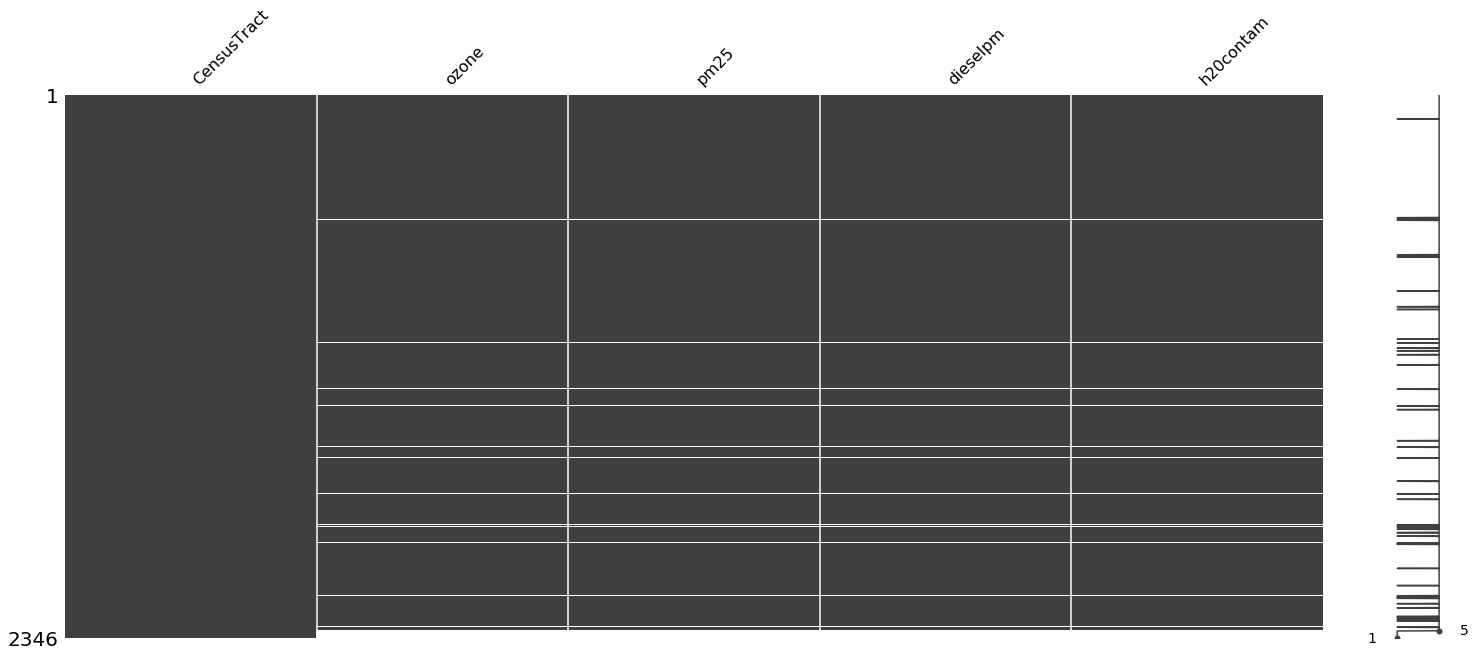

In [20]:
msno.matrix(HPI_labels_df)

In [21]:
HPI_labels_df.to_csv('HPI_labels.csv')